In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Eksperimen/NLP FraudGuard/frauddata.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal
1140,Mba mau kirim 300 ya,normal
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal


In [ ]:
df['label'].value_counts()

label
normal      569
penipuan    335
promo       239
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()
df

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal
1140,Mba mau kirim 300 ya,normal
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal


In [ ]:
def lowercase(text) :
  return text.lower()

df['Clean_Teks'] = df['Teks'].apply(lowercase)
df

<ipython-input-7-620a5d9c29ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Teks'].apply(lowercase)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,[promo] beli paket flash mulai 1gb di my telko...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,"2016-07-08 11:47:11.plg yth, sisa kuota flash ..."
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,"2016-08-07 11:29:47.plg yth, sisa kuota flash ..."
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,4.5gb/30 hari hanya rp 55 ribu spesial buat an...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,"yooo sama2, oke nanti aku umumin di grup kelas"
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,😁 sebelumnya ga ad nulis kerudung. kirain warn...
1140,Mba mau kirim 300 ya,normal,mba mau kirim 300 ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama1 beaok bwrangkat pagi...mau cas atay tra...


In [ ]:
import string, re

def remove_punctuations(text) :

  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F926-\U0001F937"
                           u"\U00010000-\U0010FFFF"
                           u"\U0001F601"
                           "]+", flags=re.UNICODE)

  text_no_emoji = emoji_pattern.sub(r'', text)

  # remove number
  text_no_number = re.sub(r"\d+", "", text)

  #remove punctuation
  text_no_punc = text_no_number.translate(str.maketrans("","",string.punctuation))

  #remove whitespace leading & trailing
  text_no_space = text_no_punc.strip()

  #remove multiple whitespace into single whitespace
  text_clear = re.sub('\s+',' ',text_no_space)

  return text_clear

df['Clean_Teks'] = df['Clean_Teks'].apply(remove_punctuations)
df

<ipython-input-8-95f1e5aa57ab>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(remove_punctuations)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari hanya rp ribu spesial buat anda yang t...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash anda kb download myte...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash anda kb download myte...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari hanya rp ribu spesial buat anda yang t...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,yooo sama oke nanti aku umumin di grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,😁 sebelumnya ga ad nulis kerudung kirain warna...
1140,Mba mau kirim 300 ya,normal,mba mau kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
def word_repetition(text):
  return re.sub(r'(.)\1+', r'\1\1', text)

df['Clean_Teks'] = df['Clean_Teks'].apply(word_repetition)

<ipython-input-9-334acbb6095c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(word_repetition)


In [ ]:
# ! pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, StopWordRemoverFactory

In [ ]:
factory = StopWordRemoverFactory()

stopwords = factory.get_stop_words()
stopword = factory.create_stop_word_remover()

In [ ]:
def stopwords(text) :
  return stopword.remove(text)

df['Clean_Teks'] = df['Clean_Teks'].apply(stopwords)
df

<ipython-input-13-114cdacfb289>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(stopwords)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rp ribu spesial buat yang terpilih akt...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash kb download mytelkoms...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,plg yth sisa kuota flash kb download mytelkoms...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rp ribu spesial buat yang terpilih akt...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,yoo sama oke aku umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,😁 sebelumnya ga ad nulis kerudung kirain warna...
1140,Mba mau kirim 300 ya,normal,mba mau kirim
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar','nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(text):
    global re_banned_words
    return re_banned_words.sub("", text)

df['Clean_Teks'] = df['Clean_Teks'].apply(lambda banned:RemoveBannedWords(banned))

<ipython-input-14-019b7162f45b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(lambda banned:RemoveBannedWords(banned))


In [ ]:
slang_file = '/content/drive/My Drive/Colab Notebooks/Eksperimen/NLP FraudGuard/slang.txt'
slangs = open(slang_file,"r",encoding="utf-8", errors='replace')

In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

clean_text = []
for review in df['Clean_Teks']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

df['Clean_Teks'] = clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-18-0d8d62501cb4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = clean_text


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stem_sentence(sentence):
    words = sentence.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_sentence = ' '.join(stemmed_words)

    return stemmed_sentence

df['Clean_Teks'] = df['Clean_Teks'].apply(stem_sentence)
df

<ipython-input-19-3c3bead9dab1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Teks'] = df['Clean_Teks'].apply(stem_sentence)


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,ya sama oke aku umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,belum tidak ada nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,normal,mba mau kirim
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama besok berangkat pagimau cas atau tranfer


In [ ]:
from collections import Counter
# Top 10 common words
all_words = ' '.join(df['Clean_Teks']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)
print(common_words)

[('yang', 186), ('tidak', 176), ('informasi', 157), ('nomor', 150), ('sudah', 140), ('mau', 131), ('kalau', 129), ('aku', 127), ('hadiah', 122), ('hari', 115)]


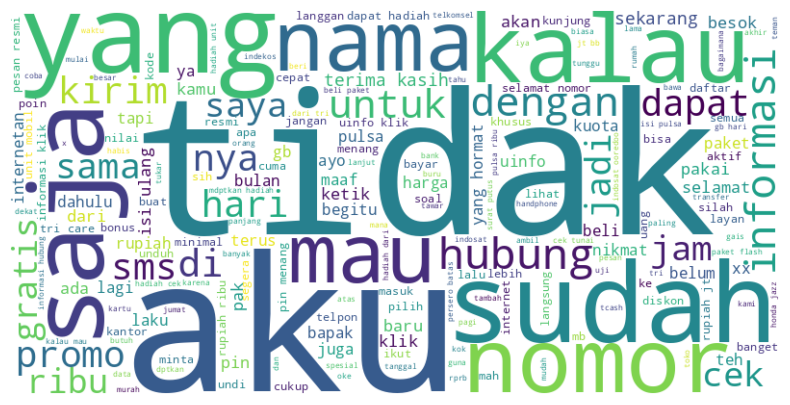

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

def fit_tokenizer(text, num_words, oov_token):
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(text)

    return tokenizer

tokenizer = fit_tokenizer(df['Clean_Teks'], NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 3595 words

<OOV> token included in vocabulary


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def seq_and_pad(text, tokenizer, padding, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(text)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, maxlen = maxlen, padding = padding)

    return padded_sequences

padded_seq = seq_and_pad(df['Clean_Teks'], tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {padded_seq.shape}\n")

Padded training sequences have shape: (1142, 120)



In [ ]:
df

,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,ya sama oke aku umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,belum tidak ada nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,normal,mba mau kirim
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama besok berangkat pagimau cas atau tranfer


In [ ]:
import pickle

with open('tokenizer.bin', 'wb') as f:
    pickle.dump(tokenizer, f)

# save clean data's dataframe to csv
df.to_csv('data_cleaned.csv', index=False)

## CONTINUE MODELLING

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df_path = '/content/drive/My Drive/Colab Notebooks/Eksperimen/NLP FraudGuard/data_cleaned.csv'

df = pd.read_csv(df_path)
df

Mounted at /content/drive


,Teks,label,Clean_Teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rupiah ribu spesial buat yang pilih ak...
...,...,...,...
1137,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,ya sama oke aku umumin grup kelas
1138,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,belum tidak ada nulis kerudung kirain warna jins
1139,Mba mau kirim 300 ya,normal,mba mau kirim
1140,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama besok berangkat pagimau cas atau tranfer


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

def fit_tokenizer(text, num_words, oov_token):
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(text)

    return tokenizer

tokenizer = fit_tokenizer(df['Clean_Teks'], NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

from tensorflow.keras.preprocessing.sequence import pad_sequences

def seq_and_pad(text, tokenizer, padding, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(text)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, maxlen = maxlen, padding = padding)

    return padded_sequences

padded_seq = seq_and_pad(df['Clean_Teks'], tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {padded_seq.shape}\n")

Vocabulary contains 3595 words

<OOV> token included in vocabulary
Padded training sequences have shape: (1142, 120)



In [ ]:
df["label_encode"] = df['label'].replace({"normal": 0, "penipuan": 1, "promo": 2})
df

,Teks,label,Clean_Teks,label_encode
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo,promo beli paket flash mulai gb my telkomsel a...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo,gb hari rupiah ribu spesial buat yang pilih ak...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...,2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo,paling yang hormat sisa kuota flash kb unduh m...,2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo,gb hari rupiah ribu spesial buat yang pilih ak...,2
...,...,...,...,...
1137,"Yooo sama2, oke nanti aku umumin di grup kelas",normal,ya sama oke aku umumin grup kelas,0
1138,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,normal,belum tidak ada nulis kerudung kirain warna jins,0
1139,Mba mau kirim 300 ya,normal,mba mau kirim,0
1140,nama1 beaok bwrangkat pagi...mau cas atay tra...,normal,nama besok berangkat pagimau cas atau tranfer,0


In [ ]:
X = padded_seq
X.shape

(1142, 120)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

Y = np.array(df['label_encode'])
y = to_categorical(Y)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim = 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 120, 128)          460288    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 120, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 64)              

In [ ]:
# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test),callbacks = [early_stop], verbose=2)

# Testing Acc
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", score[1])

Epoch 1/50
15/15 - 26s - loss: 1.0102 - accuracy: 0.5049 - val_loss: 0.9310 - val_accuracy: 0.4323 - 26s/epoch - 2s/step
Epoch 2/50
15/15 - 17s - loss: 0.7408 - accuracy: 0.6396 - val_loss: 0.7266 - val_accuracy: 0.7074 - 17s/epoch - 1s/step
Epoch 3/50
15/15 - 16s - loss: 0.4940 - accuracy: 0.7579 - val_loss: 0.6595 - val_accuracy: 0.7118 - 16s/epoch - 1s/step
Epoch 4/50
15/15 - 16s - loss: 0.4021 - accuracy: 0.7755 - val_loss: 0.5463 - val_accuracy: 0.7555 - 16s/epoch - 1s/step
Epoch 5/50
15/15 - 16s - loss: 0.3479 - accuracy: 0.7897 - val_loss: 0.5606 - val_accuracy: 0.7991 - 16s/epoch - 1s/step
Epoch 6/50
15/15 - 16s - loss: 0.2524 - accuracy: 0.8894 - val_loss: 0.4603 - val_accuracy: 0.8384 - 16s/epoch - 1s/step
Epoch 7/50
15/15 - 16s - loss: 0.1399 - accuracy: 0.9463 - val_loss: 0.4044 - val_accuracy: 0.9039 - 16s/epoch - 1s/step
Epoch 8/50
15/15 - 16s - loss: 0.0651 - accuracy: 0.9814 - val_loss: 0.3915 - val_accuracy: 0.9170 - 16s/epoch - 1s/step
Epoch 9/50
15/15 - 16s - loss: 0

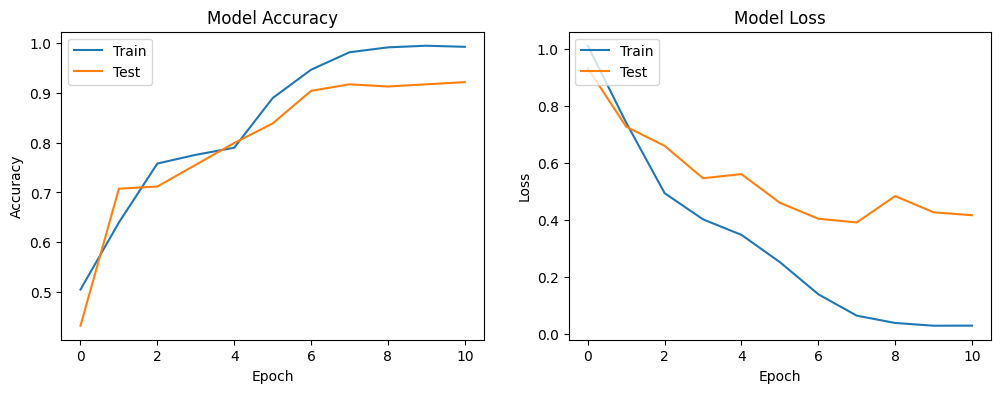

In [ ]:
# Acc and Loss

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

8/8 [==============================] - 2s 121ms/step


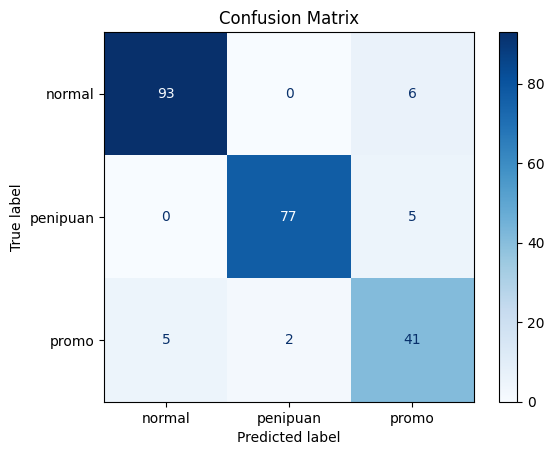

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=["normal", "penipuan", "promo"])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# # Menyimpan model ke file .h5
# model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import tensorflow as tf

# # Konversi model ke TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter._experimental_lower_tensor_list_ops = False
# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)